# Brickset Clean Sets

Workflow: 1   

Goal: To do some EDA on all the data fields and clean them in the process. 

Result: The cleaned dataset is exported as ```brickset_set_clean.csv```.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2            # reload custom py file eveytime a new cell is run

import sys
sys.path.append('../')
import lego_helper as lh

## Import Raw Data

In [4]:
RAW_FILE = '../data/brickset_set_full.csv'
set_df = pd.read_csv(RAW_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,301.0,0.0,NaN,NaN,$20.00,"New: $200, Used: $78",4.4,5,"4X4, Aircraft, Articulated Lorry, Boat, Car, C...",Normal,NaN,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,533.0,0.0,NaN,NaN,$39.00,"New: $566, Used: $109",4.5,2,"Articulated Lorry, Base, Baseplate, Crane, For...",Normal,NaN,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,537.0,0.0,NaN,NaN,$59.00,"New: $252, Used: $97",5.0,2,"8 Wheel Vehicle, Crane, Electric Motor, Mobile...",Normal,NaN,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,$4.75,"New: Not known, Used: Not known",NaN,NaN,NaN,Normal,NaN,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,34.0,0.0,NaN,NaN,$4.75,"New: $29, Used: $5",NaN,NaN,NaN,Normal,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13754 entries, 0 to 13753
Data columns (total 18 columns):
set_no           13754 non-null object
name             13754 non-null object
theme_group      13754 non-null object
theme            13754 non-null object
subtheme         10040 non-null object
year             13754 non-null float64
piece_cnt        10858 non-null float64
minifig_cnt      13754 non-null float64
inventory_url    6958 non-null object
minifig_url      6264 non-null object
store_price      9182 non-null object
current_price    13754 non-null object
rating_value     6813 non-null float64
rating_votes     6813 non-null object
tags             10265 non-null object
set_type         13753 non-null object
packaging        8919 non-null object
notes            5231 non-null object
dtypes: float64(4), object(14)
memory usage: 1.9+ MB


## Explore & Clean the Fields

In [5]:
# investigate set-no

offno_df = set_df.loc[set_df['set_no'].str.contains('-1') == False]
offno_ls = offno_df['set_no'].apply(lambda s: s[:-2])
offno_ls[:5]

19    1041
20    1050
23    1076
41    1129
45    1651
Name: set_no, dtype: object

In [6]:
# there's a good number of sets with set-no ending in -2, -3, etc

set_df.loc[set_df['set_no'].str.contains('|'.join(offno_ls))].sort_values('set_no').shape

(3145, 18)

In [7]:
# group themes are too broad

set_df['theme_group'].value_counts()

Miscellaneous       4119
Licensed            1605
Modern day          1498
Pre-school          1359
Action/Adventure    1068
Basic                750
Girls                539
Model making         513
Constraction         501
Technical            467
Historical           466
Educational          406
Racing               247
Junior               213
Vintage themes         3
Name: theme_group, dtype: int64

In [8]:
# theme is the best way of categorizing

set_df['theme'].value_counts().head(20)

Gear                       2063
Duplo                      1117
Star Wars                   662
Town                        594
Collectable Minifigures     547
City                        547
Promotional                 418
Bionicle                    389
Creator                     388
Basic                       370
Service Packs               365
Technic                     360
Friends                     303
Space                       294
Castle                      277
Books                       265
Ninjago                     242
Education                   230
Racers                      225
Seasonal                    146
Name: theme, dtype: int64

In [9]:
# subtheme does not appear useful

set_df['subtheme'].value_counts().head(10)

Product Collection          346
Watches/Clocks              233
Magazine Gift               145
Miscellaneous               140
Trains                      140
Promotional                 132
Monthly Mini Model Build    129
Housewares                  121
Technic                     111
Stationery                  105
Name: subtheme, dtype: int64

In [10]:
InteractiveShell.ast_node_interactivity = 'last'

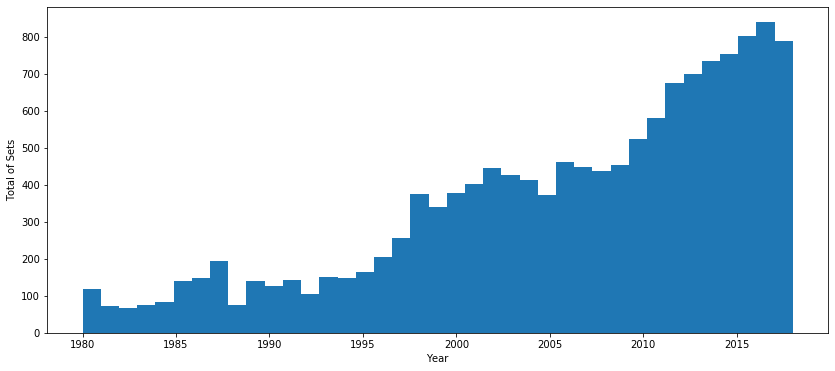

In [11]:
# plot number of sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='Total of Sets')
plt.show()

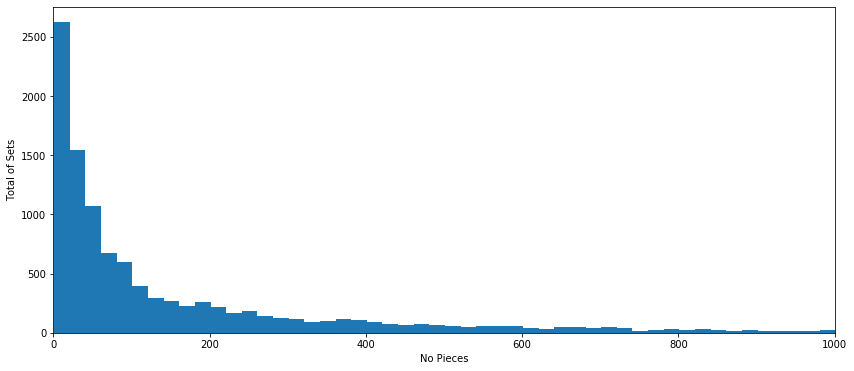

In [12]:
# plot the piece count distribution

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df.loc[(set_df['piece_cnt'] >= 1)]['piece_cnt'].values, bins=500)
axs.set(xlabel='No Pieces', ylabel='Total of Sets', xlim=(0, 1000))
plt.show()

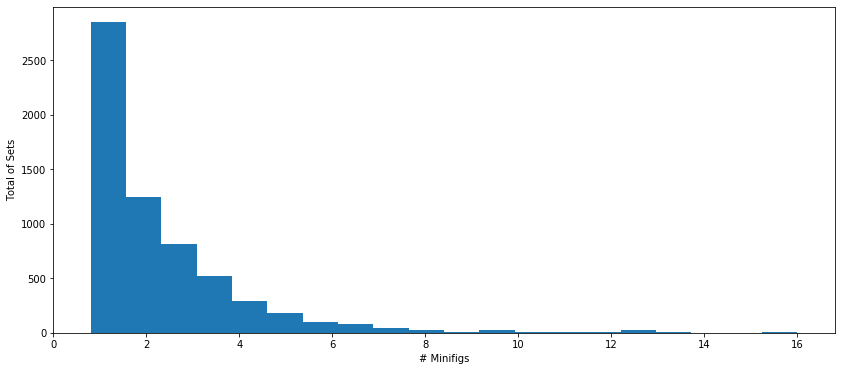

In [13]:
# plot the minifig count distribution

minifig_df = set_df.loc[(set_df['minifig_cnt'] >= 1) & (set_df['minifig_cnt'] <= 20)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(minifig_df['minifig_cnt'].values, bins=20)
axs.set(xlabel='# Minifigs', ylabel='Total of Sets', xlim=(0, 21))
axs.set_xticklabels(range(0, 22, 2))

plt.show()

In [14]:
# clean up the store price

set_df['price_store'] = set_df['store_price'].apply(lh.clean_price)
set_df[['set_no', 'name', 'store_price', 'price_store']][1305:1315]

,set_no,name,store_price,price_store
1305,2780-1,Complete Playhouse,NaN,NaN
1306,4011-1,Cabin Cruiser,$19.75,19.75
1307,4021-1,Police Patrol,$34.00,34.00
1308,4031-1,Firefighter,$52.00,52.00
1309,4515-1,Straight Rails,"£11.99, $12.99",12.99
1310,4520-1,Curved Rails,"£11.99, $12.99",12.99
1311,4531-1,Manual Points with Track,$27.99,27.99
1312,4536-1,Blue Hopper Car,$15.00,15.00
1313,4539-1,Manual Level Crossing,$25.00,25.00
1314,4543-1,Railroad Tractor Flatbed,$22.00,22.00


/Users/philbert/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/philbert/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


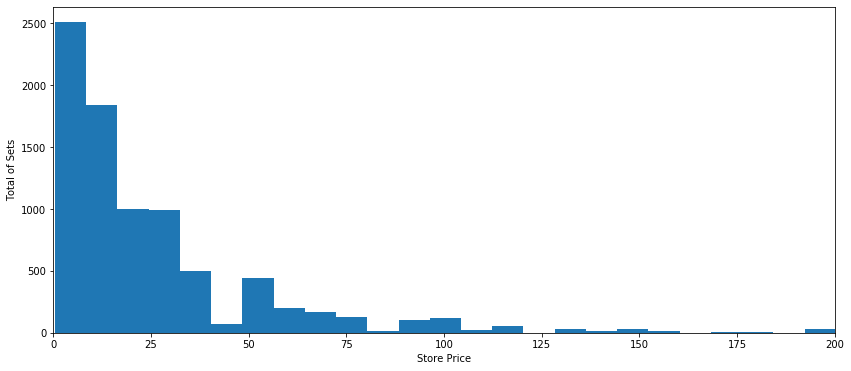

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_store'].values, bins=100)
axs.set(xlabel='Store Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [16]:
# create 2 new columns for current price

set_df['price_used'] = set_df['current_price'].apply(lh.get_price_used)
set_df['price_new'] = set_df['current_price'].apply(lh.get_price_new)
set_df[['set_no', 'name', 'current_price', 'price_used', 'price_new']][2205:2215]

,set_no,name,current_price,price_used,price_new
2205,2161-1,Aqua Dozer,"New: $90, Used: $22",22.0,90.0
2206,2162-1,Hydro Reef Wrecker,"New: $89, Used: $44",44.0,89.0
2207,2163-1,Toucan,"New: $1, Used: $0",0.0,1.0
2208,2164-1,Whale,"New: $2, Used: $1",1.0,2.0
2209,2165-1,Rhinocerous,"New: $2, Used: Not known",NaN,2.0
2210,2166-1,Elephant,"New: $3, Used: Not known",NaN,3.0
2211,2167-1,Penguin,"New: $2, Used: Not known",NaN,2.0
2212,2168-1,Rattle,"New: $5, Used: Not known",NaN,5.0
2213,2181-1,Infomaniac,"New: $270, Used: $45",45.0,270.0
2214,2184-1,XL Bulk Bucket,"New: Not known, Used: Not known",NaN,NaN


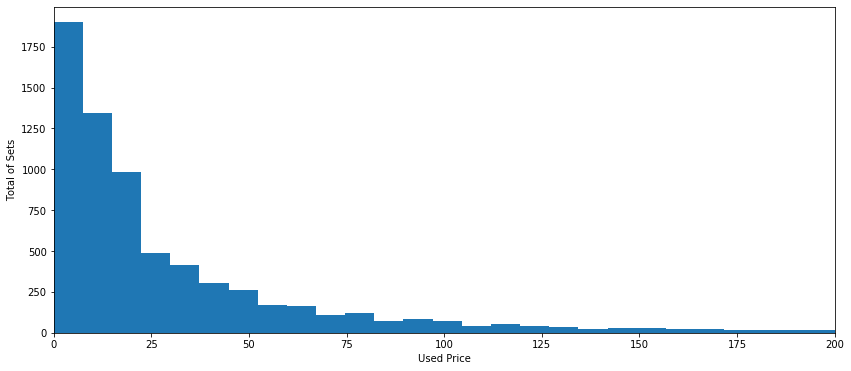

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['price_used'].values, bins=200)
axs.set(xlabel='Used Price', ylabel='Total of Sets', xlim=(0, 200))

plt.show()

In [18]:
# clean the ratings votes column

set_df['rating_votes_cl'] = set_df['rating_votes'].apply(lh.clean_votes).astype('float')
set_df[['set_no', 'name', 'rating_votes', 'rating_votes_cl']][2205:2215]

,set_no,name,rating_votes,rating_votes_cl
2205,2161-1,Aqua Dozer,6,6.0
2206,2162-1,Hydro Reef Wrecker,3,3.0
2207,2163-1,Toucan,NaN,NaN
2208,2164-1,Whale,NaN,NaN
2209,2165-1,Rhinocerous,NaN,NaN
2210,2166-1,Elephant,NaN,NaN
2211,2167-1,Penguin,1review,1.0
2212,2168-1,Rattle,NaN,NaN
2213,2181-1,Infomaniac,2,2.0
2214,2184-1,XL Bulk Bucket,NaN,NaN


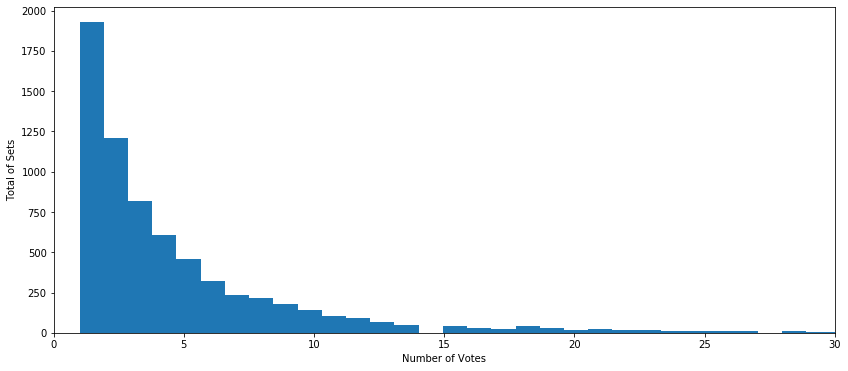

In [19]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['rating_votes_cl'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

In [20]:
# investigate the tags 

tag_raw_ls = set_df.loc[set_df['tags'].isna()==False]['tags'].values
tag_raw_ls.shape

(10265,)

In [21]:
tag_st = set(tag_raw_ls)
len(tag_st)

7553

In [22]:
tag_ls = lh.count_in_lists(list(tag_st))
tag_df = pd.DataFrame(tag_ls).sort_values('count', ascending=False).reset_index()
tag_df = tag_df[['tag', 'count']]
tag_df.head()

,tag,count
0,Polybag,804
1,Aircraft,637
2,Microscale,568
3,Car,480
4,Brick Built Animals,450


In [23]:
tag_df.shape

(3361, 2)

In [24]:

set_df['main_tag'] = set_df['tags'].apply(lh.get_main_tag)
set_df[['set_no', 'name', 'tags', 'main_tag']][1000:1005]

,set_no,name,tags,main_tag
1000,1649-1,Sea Skimmer,"Airboat, Mcdonalds, Polybag",None
1001,1653-1,Container Set,NaN,None
1002,1661-1,Basic Building Set,NaN,None
1003,1662-1,Basic Building Set,"Baseplate, Boat, Carriage, Furniture, Horse, H...",None
1004,1663-1,Basic Building Set,NaN,None


In [25]:
# set type
# only the Normal type should be kept
# Gear is keychains, games 
# Collection is Normal sets bundled together, these are not in the secondary market
# Extended can be like Collection, but even more unavailable 

set_df['set_type'].value_counts()

Normal        9909
Gear          2063
Other          645
Collection     488
Extended       347
Book           265
Random          36
Name: set_type, dtype: int64

In [26]:
set_df.loc[set_df['set_type']=='Gear'][200:205]

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,...,rating_votes,tags,set_type,packaging,notes,price_store,price_used,price_new,rating_votes_cl,main_tag
4709,14683-1,BIONICLE: The Game,Miscellaneous,Gear,Video Games/PC,2003.0,NaN,0.0,NaN,NaN,...,4,"Bionicle, Cd Rom",Gear,NaN,NaN,NaN,NaN,NaN,4.0,None
4710,14684-1,BIONICLE: The Game,Miscellaneous,Gear,Video Games/Game Boy Advance,2003.0,NaN,0.0,NaN,NaN,...,1review,NaN,Gear,NaN,NaN,NaN,NaN,NaN,1.0,None
4724,850252-1,Johnny Thunder,Miscellaneous,Gear,Key Chains/Adventurers,2003.0,NaN,0.0,NaN,NaN,...,NaN,NaN,Gear,NaN,NaN,NaN,NaN,NaN,NaN,None
4725,850352-1,Snowtrooper,Miscellaneous,Gear,Key Chains/Star Wars,2003.0,NaN,0.0,NaN,NaN,...,NaN,NaN,Gear,NaN,Cardboard Back,NaN,NaN,NaN,NaN,None
4726,850356-1,C-3PO,Miscellaneous,Gear,Key Chains/Star Wars,2003.0,NaN,0.0,NaN,NaN,...,NaN,NaN,Gear,NaN,Cardboard Back,NaN,NaN,NaN,NaN,None


In [27]:
# packaging 
# keep Box and NaN

set_df['packaging'].value_counts()

Box                      5306
Polybag                  1732
Foil pack                 853
Blister pack              218
None (loose parts)        173
Bucket                    129
Other                     120
Tag                       114
Canister                   73
Tub                        66
Plastic box                58
Shrink-wrapped             25
Box with backing card      23
Box with handle            14
Zip-lock bag                9
Plastic canister            6
Name: packaging, dtype: int64

In [28]:
set_df.loc[set_df['packaging']!='Box'].shape

(8448, 23)

In [51]:
set_df.loc[set_df['packaging']=='Box'].sort_values('piece_cnt')[20:25]

,set_no,name,theme_group,theme,subtheme,year,piece_cnt,minifig_cnt,inventory_url,minifig_url,...,rating_votes,tags,set_type,packaging,notes,price_store,price_used,price_new,rating_votes_cl,main_tag
494,2403-1,Fire Chief Building Set,Pre-school,Duplo,NaN,1985.0,4.0,1.0,NaN,/minifigs/inset-2403-1,...,NaN,NaN,Normal,Box,NaN,NaN,NaN,NaN,NaN,None
6170,7996-1,Train Rail Crossing,Modern day,City,Trains,2007.0,4.0,0.0,/inventories/7996-1,NaN,...,2,"Track, Train Track",Normal,Box,NaN,24.99,100.0,114.0,2.0,None
5008,8613-1,Kanoka Disk Launcher Pack,Constraction,Bionicle,Accessories,2004.0,4.0,0.0,/inventories/8613-1,NaN,...,8,Kanoka,Normal,Box,NaN,2.00,1.0,3.0,8.0,None
3486,8515-1,RoboRider Wheels,Technical,Technic,Robo Riders,2000.0,4.0,0.0,NaN,NaN,...,2,Accessory,Normal,Box,NaN,2.00,1.0,4.0,2.0,None
3514,1239-1,Subzero,Racing,Racers,Xalax,2001.0,4.0,0.0,NaN,NaN,...,5,NaN,Normal,Box,Promotional release with Birdseye/Walls frozen...,NaN,5.0,5.0,5.0,None


In [29]:
set_df.loc[set_df['packaging'].isna()].shape

(4835, 23)

In [54]:
set_df.loc[set_df['packaging']=='Polybag'].sort_values('piece_cnt')[['set_no', 'name', 'theme_group', 'theme', 'piece_cnt', 
                                                     'year', 'packaging', 'price_store', 'price_new', 'price_used']][20:25]

,set_no,name,theme_group,theme,piece_cnt,year,packaging,price_store,price_new,price_used
8981,4659612-1,Spinner ring,Action/Adventure,Ninjago,1.0,2012.0,Polybag,NaN,6.0,NaN
3511,1202-1,Single Racers Figure Pack,Racing,Racers,1.0,2001.0,Polybag,NaN,NaN,NaN
828,5105-1,Pneumatic Piston Cylinder 64 mm Yellow,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.5,11.0,NaN
827,5104-1,Pneumatic Piston Cylinder 48 mm Yellow,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.0,14.0,6.0
826,5103-1,Pneumatic Spring Cylinder 48 mm Red,Miscellaneous,Service Packs,1.0,1987.0,Polybag,2.0,10.0,NaN


In [ ]:
# notes - several keywords are available, but they are not more useful than existing columns
# there are only 49 re-released sets, which all have their own fields, so keeping them as is is fine

note_df = set_df.loc[set_df['notes'].isna()==False]
note_df.loc[note_df['notes'].str.contains('Re-released version')][['set_no', 'name', 'notes']].shape

In [ ]:
set_df.loc[set_df['set_no']=='4999-1']

In [ ]:
set_df.info()

In [ ]:
# keep only the clean columns 

set_clean_df = set_df[['set_no', 'name',  
                 'theme_group', 'theme', 'subtheme',
                 'year', 'piece_cnt', 'minifig_cnt', 'inventory_url', 'minifig_url',
                 'price_store', 'price_new', 'price_used', 'rating_value', 'rating_votes_cl', 
                 'main_tag', 'set_type', 'packaging']]
set_clean_df = set_clean_df.rename(columns={'rating_votes_cl': 'rating_votes'})
set_clean_df[2000:2010]

In [ ]:
set_clean_df.info()

## Export to csv

In [ ]:
save_path = r'../data/brickset_set_clean.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'